## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv("grades.csv")

In [5]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
grade    100 non-null float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [6]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


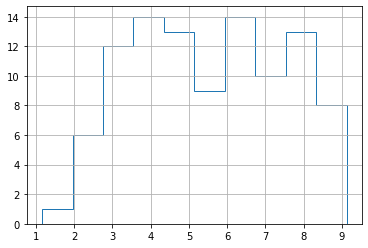

In [7]:
pop.grade.hist(histtype='step')

In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


Histogram has no recognizable simple from but the mean for the sample is 5.5. What can we about the true mean value? This time we cannot built a confidence interval by simulating a sampling distribution because we do not know how to describe it, and indeed given the observed histogram, it is unlikely that it has a simple form such as a normal distribution. However, we can still use computing by adopting a powerful idea in modern statistics- Bootstrapping


In [15]:
def sampling np.random.choice(pop.grade,10)

array([5.71314984, 3.70707845, 7.86656684, 5.66390375, 7.99386695,
       3.92067589, 8.35160501, 7.89411902, 3.16120247, 8.46735311])

In [20]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.376320
std,1.933474
min,1.983167
25%,3.536306
50%,5.844761
75%,6.717777
max,9.120705


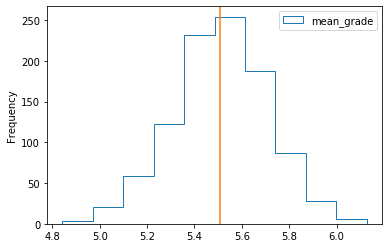

In [31]:
bootstrap = pd.DataFrame({'mean_grade':[pop.sample(100,replace=True).grade.mean() for i in range(1000)]})
bootstrap.plot.hist(histtype='step')
pp.axvline(x=pop.grade.mean(),color='C1')

In [33]:
bootstrap.mean_grade.quantile(0.025),bootstrap.mean_grade.quantile(0.975)

(5.099855515693457, 5.908053811787898)